In [1]:
import torch
import torch.nn
import torchvision
from torchvision import transforms
import numpy as np
from matplotlib import pyplot as plt
from torchvision.utils import make_grid
import os

In [2]:
def my_conv2d(input, kernel):
    # batch size => N
    # number of channels => C_in
    # height of the input planes in pixels => H_in
    # width of the input planes in pixels => W_in
    
    # input size: [N, C_in, H_in, W_in]
    # initialize the input parameters
    N = input.shape[0]
    C_in = input.shape[1]
    H_in = input.shape[2]
    W_in = input.shape[3]
    
    # kernel size: [C_out, C_in, H_kernel, W_kernel]
    # initialize the kernel parameters
    # initialize the kernel sizes
    C_out = kernel.shape[0]
    C_in = kernel.shape[1]
    H_kernel = kernel.shape[2]
    W_kernel = kernel.shape[3]
    
    # Calculate height of the output plane in pixels, H_out:
    H_out = H_in - H_kernel + 1

    # Calculate width of the output plane in pixels, W_out:
    W_out = W_in - W_kernel + 1
    
    # The output tensor should be initialized by zeros with these sizes:
    # output size: [N, C_out, H_out, W_out]

    output = np.zeros((N, C_out, H_out, W_out))
    
    # Convolution Operation can be described as:

    # output(N_i, C_outj) = bias(C_outj) + Sum[from k=0 to C_in-1](weight(C_outj, k) * input(N_i, k)
    # where * is 2D Cross-correlation operator
    # This convolution operation can be implemented using nested for loops. The outer for loop should start with the 
    # batch size since we perform this operation for each batch. Then, the next for loop should iterate through the 
    # output channels since for each batch, we must calculate this operation of all of the channels.
    # After that, the next for loop should iterate through the input channels since the sum operation is from 0 to
    # C_in - 1. This describes the sum operation properly. Moving on, we must calculate the convolution operation
    # from the first index of the input to the last index of the input, which can be done by another two nested for 
    # loops that iterates for output height and output width, respectively.

    # In our case, there will be no bias, that's why the convolution operation will be as follows:
    # output(N_i, C_outj) = Sum[from k=0 to C_in-1](weight(C_outj, k) * input(N_i, k)
    
    # Convolution Operation
    for batch in range(N):
        for ch_out in range(C_out):
            for ch_in in range(C_in):
                for height in range(H_out):
                    for width in range(W_out):
                        output[batch, ch_out, height, width] += np.sum(input[batch, ch_in, height:height+H_kernel, width:width+W_kernel] * kernel[ch_out, ch_in, :, :])
    return output

# Add part2Plots function

In [4]:
# Default settings of the torch.nn.Conv2d function:
# torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, 
#                   padding=0, dilation=1, groups=1, bias=True, 
#                   padding_mode='zeros', device=None, dtype=None

In [5]:
# input shape: [batch size, input_channels, input_height, input_width]
input = np.load("samples_1.npy")
# kernel shape: [output_channels, input_channels, filter_height, filter width]
kernel = np.load("kernel.npy")

out = my_conv2d(input, kernel)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


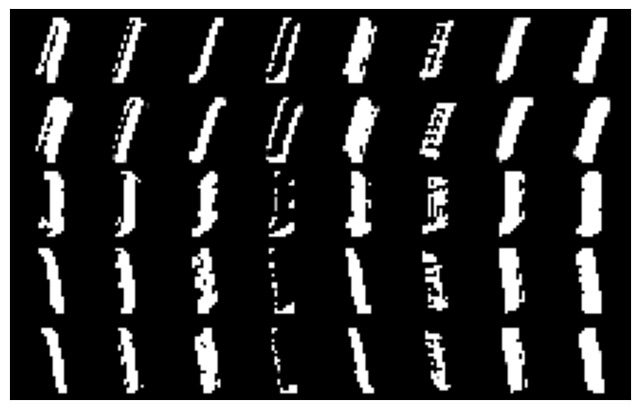

In [6]:
# Plotting the result of the my_conv2d function
part2Plots(out)